In [1]:
from ds_discovery import SyntheticBuilder
import pandas as pd

In [2]:
builder = SyntheticBuilder.from_memory()

### Classification
Each of the synthetic builder can be simply built passing the index size as the canonical, using the default parameter values for the generator.

In [3]:
df = builder.tools.model_synthetic_classification(1000, n_features=5, n_informative=2, n_redundant=3)

In [4]:
# 10 features and the target
df.shape

(1000, 6)

In [5]:
df.head()

,target,A,B,C,D,E
0,0,0.081498,-0.055256,-0.129587,0.095545,0.192763
1,0,0.001904,-1.311043,-0.874995,-0.983323,0.021573
2,0,2.439482,-0.894889,-3.373558,3.431131,5.760077
3,1,-0.750105,0.082110,0.908793,-1.200292,-1.768624
4,0,0.084704,-1.547301,-1.126566,-1.021787,0.219762


In [6]:
df.corrwith(df["target"]).sort_values()

E        -0.532391
A        -0.527203
D        -0.009385
B         0.663147
C         0.759767
target    1.000000
dtype: float64

### Regression
Common across all the synthetic intent method calls is the number of features for the output dataset and a seeding for testing. Based upon the Scikit-learn datasets generators, parameters relating to the underlying method can be passed as keyword arguments (kwargs)

In [7]:
df = builder.tools.model_synthetic_regression(1000, n_features=10, seed=31)

In [8]:
df.shape

(1000, 11)

In [9]:
df.head()

,target,A,B,C,D,E,F,G,H,I,J
0,206,-1.496976,-0.439517,-0.511914,1.120465,1.849035,1.208033,0.827422,-1.037454,-0.600488,1.025674
1,-63,-0.101218,-0.617963,-1.250853,-0.407170,0.487207,0.041606,0.592822,-0.699810,-0.745605,-0.395820
2,-23,1.116500,-1.411187,0.153828,-1.298515,-0.341653,-0.414625,1.075062,0.515151,-0.589614,2.237948
3,-292,-1.631354,1.926981,0.861915,-1.464581,-1.119925,-0.988311,0.307861,0.514244,-1.008229,-1.269010
4,-148,-0.057407,0.555374,-0.678157,-1.034809,-0.404090,-1.079174,0.528394,0.620440,0.726926,0.268692


### Clusters
clusters has an addition parameter where each element of a list indicates the number of samples per cluster. The sum of the list must equal the samples in the dataframe. By default the cluster samples are evenly distributed across three clusters. The clusters list can be used to increase the number of clusters, in this case four.

In [10]:
df = builder.tools.model_synthetic_clusters(1000, clusters=[800, 100, 50, 50])

In [11]:
# 10 features and the target
df.shape

(1000, 101)

In [12]:
df['target'].value_counts()

0    800
1    100
2     50
3     50
Name: target, dtype: int64

## Graphical Visualisation

In [13]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])


### Classification

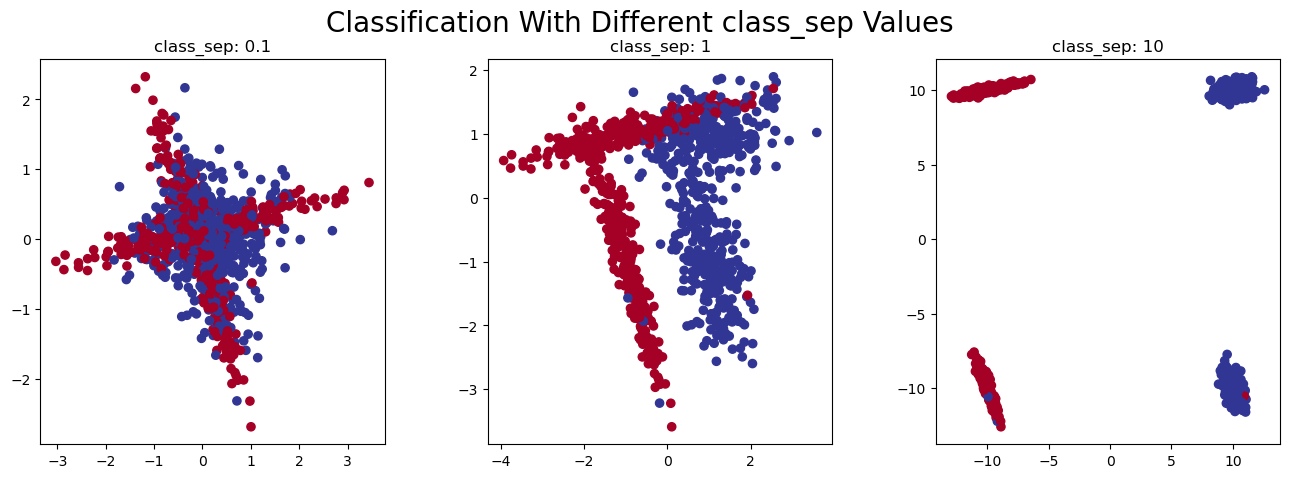

In [14]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([0.1,1,10],plt_ind_list):
    df = builder.tools.model_synthetic_classification(1000, n_features=2, n_repeated=0, class_sep=class_sep, n_redundant=0, seed=31)
    y = np.asarray(df['target'])
    x = np.asarray(df.drop(columns=['target']))
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0], x[:,1], c=y, vmin=min(y), vmax=max(y), s=35, cmap=color_map)
    plt.title('class_sep: '+str(class_sep))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('Classification With Different class_sep Values',fontsize=20)
plt.show()


### Regression

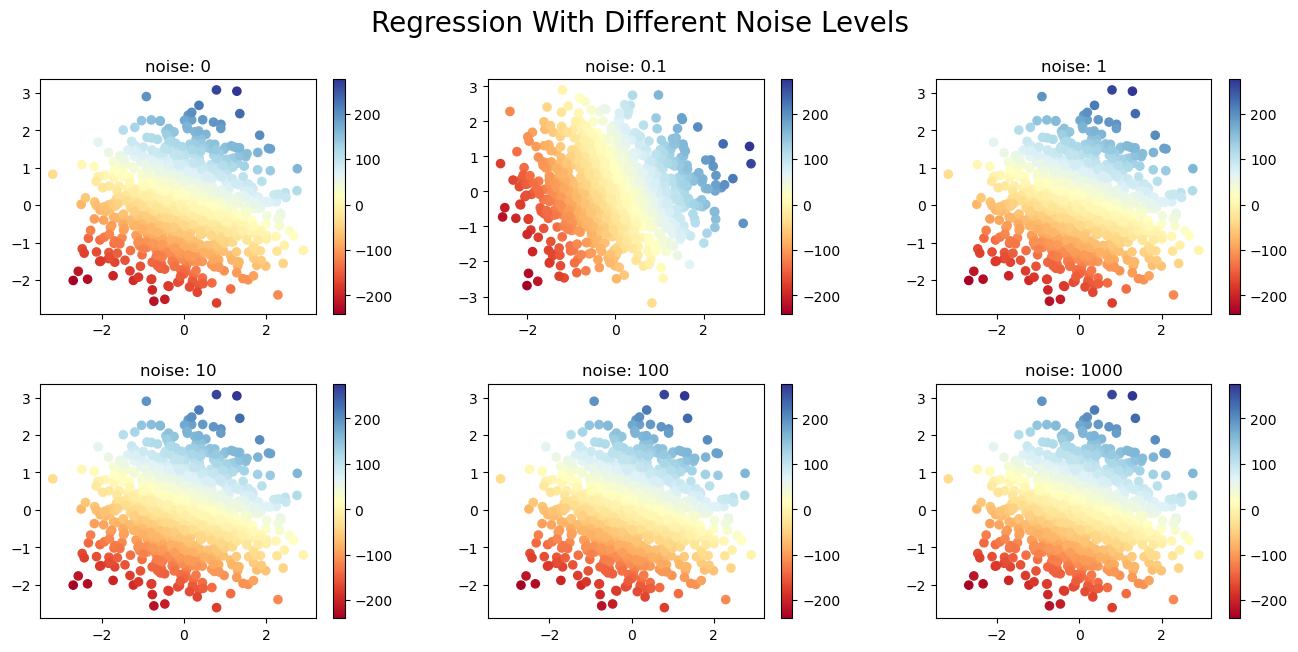

In [15]:
map_colors = plt.cm.get_cmap('RdYlBu')
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(16,7))
plt_ind_list = np.arange(6)+231

for noise,plt_ind in zip([0,0.1,1,10,100,1000],plt_ind_list): 
    df = builder.tools.model_synthetic_regression(1000, n_features=2, noise=noise, seed=31) 
    y = np.asarray(df['target'])
    x = np.asarray(df.drop(columns=['target']))

    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0], x[:,1], c=y, vmin=min(y), vmax=max(y), s=35, cmap=color_map)
    
    plt.title('noise: '+str(noise))
    plt.colorbar(my_scatter_plot)
    
fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('Regression With Different Noise Levels',fontsize=20)
plt.show()


### Cluster

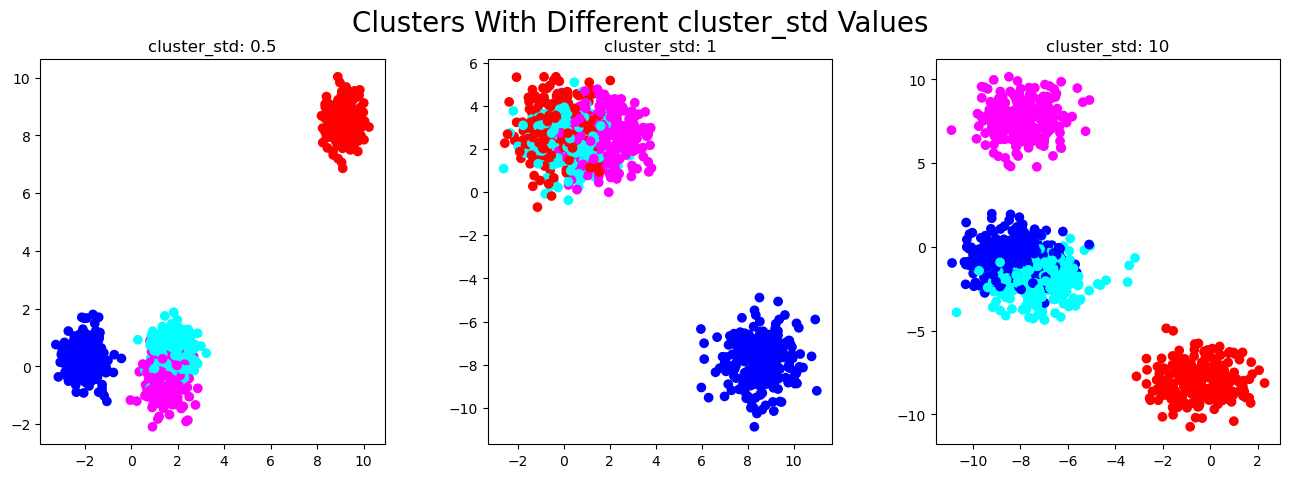

In [16]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for std,plt_ind in zip([0.5,1,10],plt_ind_list):
    df = builder.tools.model_synthetic_clusters(1000, n_features=2, centers=4, cluster_std=std, seed=31)
    y = np.asarray(df['target'])
    x = np.asarray(df.drop(columns=['target']))
    
    plt.subplot(plt_ind)    
    my_scatter_plot = plt.scatter(x[:,0], x[:,1], c=y, vmin=min(y), vmax=max(y), cmap=color_map_discrete)
    plt.title('cluster_std: '+str(std))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('Clusters With Different cluster_std Values',fontsize=20)
plt.show()
